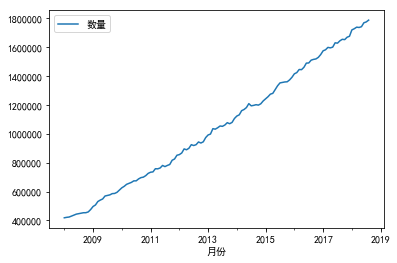

In [1]:
from lxml import etree
import requests
import time
import pandas as pd
import re

root_url='http://data.eastmoney.com/cjsj/moneysupply.aspx?p=%s'
urls=[root_url%x for x in range(1,8)]
l3=[]
for url in urls:
    r=requests.get(url)
    r.encoding='gb2312'
    response=etree.HTML(r.text)
    trs=response.xpath('//div[3][@class="Content"]/table/tr')
    l2=[]
    for tr in trs[2:]:
        tds=tr.xpath('td')
        l1=[]
        if tds:
            l1.append(tds[0].xpath('./text()')[0])
            l1.append(tds[1].xpath('./text()')[0])
            for td in tds[2:4]:
                l1.append(td.xpath('span/text()')[0])
            l2.append(l1)
    l3.extend(l2)
df=pd.DataFrame(l3,columns=['月份','数量','同比','环比'])#columns=['月份','数量','同比','环比']
f=lambda x:re.sub('[\s]','',str(x))
df=df.applymap(f)
df['月份']=df['月份'].str.replace('[年,月,份]','')
f=lambda a:a[:4]+'.'+a[-2:]
df['月份']=df['月份'].map(f)
df.sort_values(by='月份',inplace=True)
df.月份=pd.to_datetime(df['月份'])
df.sort_values(by='月份',inplace=True)
df['数量']=df['数量'].astype('float')
df.plot(x='月份',y='数量')



In [4]:
df

,月份,数量,同比,环比
127,2008-01-01,417846.17,18.88%,3.58%
126,2008-02-01,421037.84,17.39%,0.76%
125,2008-03-01,423054.53,16.19%,0.48%
124,2008-04-01,429313.72,16.94%,1.48%
123,2008-05-01,436221.60,18.07%,1.61%
122,2008-06-01,443141.02,17.37%,1.59%
121,2008-07-01,446362.17,16.35%,0.73%
120,2008-08-01,448846.68,16.00%,0.56%
119,2008-09-01,452898.71,15.29%,0.90%
118,2008-10-01,453133.32,15.02%,0.05%


In [53]:
# r.content.decode('gb2312')
import chardet
chardet.detect(r.content)

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}